In [1]:
!pip install easyocr passporteye

In [2]:
!pip install opencv-python numpy 

In [11]:
pip install opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import easyocr
import cv2
import matplotlib.pyplot as plt

# OCR уншигч үүсгэх
reader = easyocr.Reader(['mn', 'en'])

# Зураг унших
image_path = 'C:/Users/lynhu/Downloads/gbdadlaga/ocr/images/passport.jpg'  # таны зурган файл
results = reader.readtext(image_path)

# Илэрсэн текстийг хэвлэх
for (bbox, text, prob) in results:
    print(f"{text} ({prob:.2f})")


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\lynhu\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


ПАСПОРТ (1.00)
МОНГОЛ УЛС (1.00)
MONGOLIA (0.98)
PASSPORT (1.00)
Терел (0.90)
Туре (0.85)
Улсын нэрийн код (0.98)
Country code (1.00)
Паспартын дугаар (0.92)
Passport No (0.71)
PE (1.00)
MNG (0.82)
PE0711990 (0.80)
Эцэг {эх} ийн нэр (0.64)
Sumame (0.99)
PUREVDORJ (0.98)
GiveП names (0.80)
KHANBILEG (1.00)
Иргэнии харьяапап (0.43)
Nationallty (0.99)
Терсен адөа, сap (0.30)
Dale uf Ыlrth (0.38)
MONGOLIA (1.00)
10/01/2005 (1.00)
Бүртгэлийн дугаар (1.00)
Persanal No (0.95)
Хүйс (1.00)
Sex (1.00)
UKh05211031 (0.92)
Олгасон вдор, сap; (0.45)
Daia oi issue (0.47)
Олгосон байгуүллага (0.87)
Auihoгitу (0.42)
17 DEC 2024 (1.00)
General Authority for (0.91)
Дуусах хугацва (1.00)
Dale ol еxрiy (0.50)
State Registration of (0.93)
16 DEC 2034 (0.99)
Mongolia (1.00)
Нэр (0.99)
ан } (0.48)


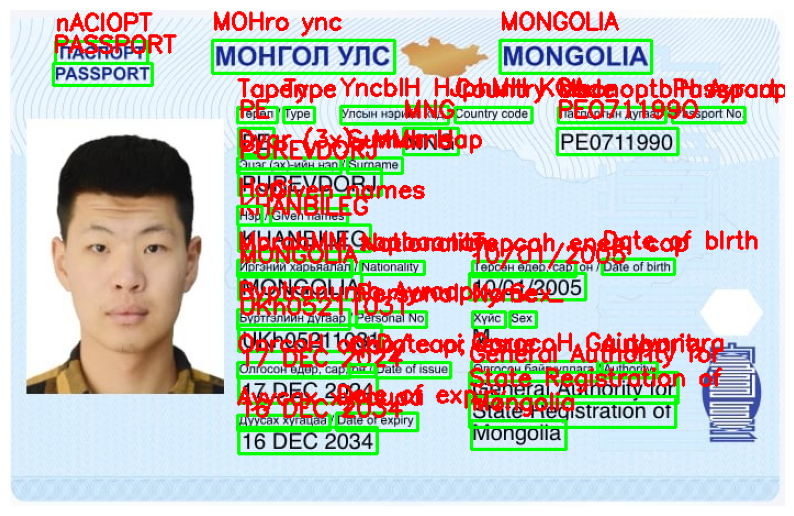

In [37]:
import cv2

# Зураг унших
image = cv2.imread(image_path)

# Текст болон хайрцаг зурна
for (bbox, text, prob) in results:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))

    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(image, text, (top_left[0], top_left[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# Зураг харуулах
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [4]:
!pip install face_recognition opencv-python matplotlib passporteye


  Using cached face_recognition-1.3.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached face_recognition_models-0.3.0-py2.py3-none-any.whl
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached dlib-20.0.0.tar.gz (3.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
Using cached click-8.2.1-py3-none-any.whl (102 kB)
Failed to build dlib


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [41 lines of output]
  running bdist_wheel
  running build
  running build_ext
  
  
                     CMake is not installed on your system!
  
      Or it is possible some broken copy of cmake is installed on your system.
      It is unfortunately very common for python package managers to include
      broken copies of cmake.  So if the error above this refers to some file
      path to a cmake file inside a python or anaconda or miniconda path then you
      should delete that broken copy of cmake from your computer.
  
      Instead, please get an official copy of cmake from one of these known good
      sources of an official cmake:
          - cmake.org (this is how windows users should get cmake)
          - apt install cmake (for Ubuntu or Debian based systems)
          - yum install cmake (for Redhat or CenOS based systems)
  
      On a linux machine you can run `which cmake` to see what cmake you are
      act

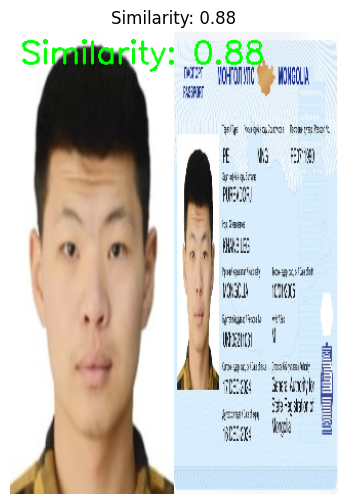

In [14]:
import matplotlib.pyplot as plt

# BGR -> RGB хувиргах (Matplotlib зөв өнгөөр харуулахын тулд)
combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(combined_rgb)
plt.axis('off')
plt.title(f"Similarity: {cos:.2f}")
plt.show()

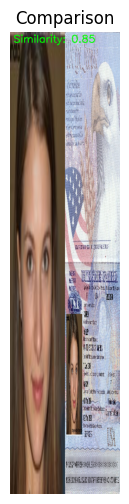

In [1]:
import cv2
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Зураг унших
img1 = cv2.imread("C:/Users/lynhu/Downloads/gbdadlaga/ocr/images/test1.jpg")
img2 = cv2.imread("C:/Users/lynhu/Downloads/gbdadlaga/ocr/images/1.png")

if img1 is None or img2 is None:
    print("Зурагнуудыг уншиж чадсангүй. Замыг шалгана уу.")
    exit()

# Ижил өндөртэй болгох
h = max(img1.shape[0], img2.shape[0])
img1 = cv2.resize(img1, (160, h))
img2 = cv2.resize(img2, (160, h))

# Cosine similarity
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY).flatten()
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY).flatten()
cos = cosine_similarity([gray1], [gray2])[0][0]

# Зэргэцүүлэх
combined = np.hstack((img1, img2))

# Text зурган дээр нэмэх
cv2.putText(combined, f"Similarity: {cos:.2f}", (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Matplotlib ашиглан харуулах
combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(combined_rgb)
plt.axis('off')
plt.title("Comparison")
plt.show()

In [12]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install deepface

  Using cached deepface-0.0.93-py3-none-any.whl.metadata (30 kB)
  Using cached gdown-5.2.0-py3-none-any.whl.metadata (5.8 kB)
INFO: pip is looking at multiple versions of deepface to determine which version is compatible with other requirements. This could take a while.
  Using cached deepface-0.0.92-py3-none-any.whl.metadata (27 kB)
  Using cached deepface-0.0.91-py3-none-any.whl.metadata (26 kB)
  Using cached deepface-0.0.90-py3-none-any.whl.metadata (26 kB)
  Using cached deepface-0.0.89-py3-none-any.whl.metadata (26 kB)
  Using cached deepface-0.0.88-py3-none-any.whl.metadata (26 kB)
  Using cached deepface-0.0.87-py3-none-any.whl.metadata (26 kB)
  Using cached deepface-0.0.86-py3-none-any.whl.metadata (24 kB)
INFO: pip is still looking at multiple versions of deepface to determine which version is compatible with other requirements. This could take a while.
  Using cached deepface-0.0.85-py3-none-any.whl.metadata (24 kB)
  Using cached deepface-0.0.84-py3-none-any.whl.metadata 

ERROR: Cannot install deepface==0.0.1, deepface==0.0.10, deepface==0.0.11, deepface==0.0.12, deepface==0.0.13, deepface==0.0.14, deepface==0.0.15, deepface==0.0.16, deepface==0.0.18, deepface==0.0.19, deepface==0.0.2, deepface==0.0.20, deepface==0.0.21, deepface==0.0.22, deepface==0.0.23, deepface==0.0.24, deepface==0.0.25, deepface==0.0.26, deepface==0.0.3, deepface==0.0.30, deepface==0.0.31, deepface==0.0.32, deepface==0.0.33, deepface==0.0.34, deepface==0.0.35, deepface==0.0.36, deepface==0.0.37, deepface==0.0.38, deepface==0.0.39, deepface==0.0.4, deepface==0.0.40, deepface==0.0.41, deepface==0.0.43, deepface==0.0.44, deepface==0.0.45, deepface==0.0.46, deepface==0.0.47, deepface==0.0.48, deepface==0.0.49, deepface==0.0.5, deepface==0.0.50, deepface==0.0.51, deepface==0.0.52, deepface==0.0.53, deepface==0.0.54, deepface==0.0.55, deepface==0.0.56, deepface==0.0.57, deepface==0.0.58, deepface==0.0.59, deepface==0.0.6, deepface==0.0.60, deepface==0.0.61, deepface==0.0.62, deepface==0.

In [28]:
import face_recognition
import cv2
import matplotlib.pyplot as plt

# Load images
my_image = face_recognition.load_image_file("photo.jpg")
passport_image = face_recognition.load_image_file("passport.jpg")

# Detect face encodings
my_face_encodings = face_recognition.face_encodings(my_image)
passport_face_encodings = face_recognition.face_encodings(passport_image)

if len(my_face_encodings) == 0 or len(passport_face_encodings) == 0:
    print("Face not detected in one of the images.")
else:
    my_face = my_face_encodings[0]
    passport_face = passport_face_encodings[0]

    # Compare faces
    results = face_recognition.compare_faces([my_face], passport_face)
    distance = face_recognition.face_distance([my_face], passport_face)[0]

    print(f"Faces match: {results[0]}")
    print(f"Similarity score (lower is more similar): {distance:.4f}")


ModuleNotFoundError: No module named 'face_recognition'